In [1]:
import tensorflow as tf
import os

Remove dodgy images

In [2]:
# import cv2
# import imghdr

In [3]:
# data_dir = 'data' 

In [4]:
# image_exts = ['jpeg','jpg', 'bmp', 'png']

In [5]:
# for image_class in os.listdir(data_dir): 
#     for image in os.listdir(os.path.join(data_dir, image_class)):
#         image_path = os.path.join(data_dir, image_class, image)
#         try: 
#             img = cv2.imread(image_path)
#             tip = imghdr.what(image_path)
#             if tip not in image_exts: 
#                 print('Image not in ext list {}'.format(image_path))
#                 os.remove(image_path)
#         except Exception as e: 
#             print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Load Data

In [6]:
import numpy as numpy
from matplotlib import pyplot as plt


In [7]:
import cv2
import imghdr

C:\Users\Biswaji Deb\AppData\Local\Temp\ipykernel_11036\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [8]:
data_dir = 'Affectnet Dataset'

In [9]:
os.listdir(data_dir)

['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [10]:
os.listdir(os.path.join(data_dir,'anger'))

['Anger_Split.txt',
 'image0000006.jpg',
 'image0000060.jpg',
 'image0000061.jpg',
 'image0000066.jpg',
 'image0000106.jpg',
 'image0000132.jpg',
 'image0000138.jpg',
 'image0000182.jpg',
 'image0000195.jpg',
 'image0000213.jpg',
 'image0000228.jpg',
 'image0000294.jpg',
 'image0000333.jpg',
 'image0000343.jpg',
 'image0000346.jpg',
 'image0000356.jpg',
 'image0000368.jpg',
 'image0000374.jpg',
 'image0000390.jpg',
 'image0000399.jpg',
 'image0000407.jpg',
 'image0000415.jpg',
 'image0000416.jpg',
 'image0000441.jpg',
 'image0000450.jpg',
 'image0000470.jpg',
 'image0000511.jpg',
 'image0000513.jpg',
 'image0000593.jpg',
 'image0000602.jpg',
 'image0000690.jpg',
 'image0000697.jpg',
 'image0000722.jpg',
 'image0000723.jpg',
 'image0000758.jpg',
 'image0000776.jpg',
 'image0000825.jpg',
 'image0000908.jpg',
 'image0000923.jpg',
 'image0000932.jpg',
 'image0000949.jpg',
 'image0000963.jpg',
 'image0000965.jpg',
 'image0000972.jpg',
 'image0000996.jpg',
 'image0001015.jpg',
 'image0001021

In [11]:
img=cv2.imread(os.path.join('Affectnet Dataset','anger','image0000006.jpg'))

In [12]:
img.shape

(96, 96, 3)

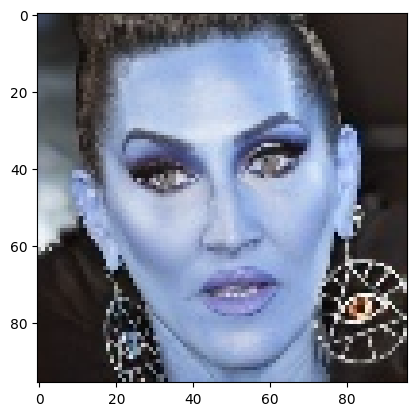

In [13]:
plt.imshow(img)

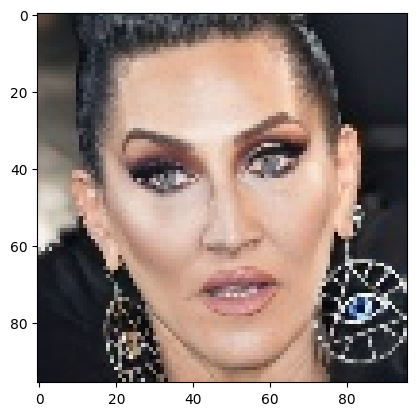

In [14]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
#tf.keras.utils.image_dataset_from_directory??

In [16]:
#Builiding data pipeline
data = tf.keras.utils.image_dataset_from_directory('Affectnet Dataset')
#still not a dataset, instead it's a generator

Found 29042 files belonging to 8 classes.


In [17]:
#Allows to loop through data pipeline
data_iterator = data.as_numpy_iterator()
data_iterator

In [18]:
batch = data_iterator.next()
#images represented as np arrays in batches of size 32
batch[0].shape

(32, 256, 256, 3)

In [19]:
#Images classified from 0-7
batch[1]

array([4, 5, 7, 2, 5, 6, 4, 3, 2, 4, 5, 0, 2, 5, 1, 4, 2, 5, 7, 4, 5, 4,
       2, 5, 1, 1, 3, 1, 7, 5, 7, 1])

In [20]:
len(batch)
#2 = images,it's labels

2

Anger = 0
Contempt = 1
disgust = 2
fear = 3
happy = 4
neutral = 5
sad = 6
Surprise = 7

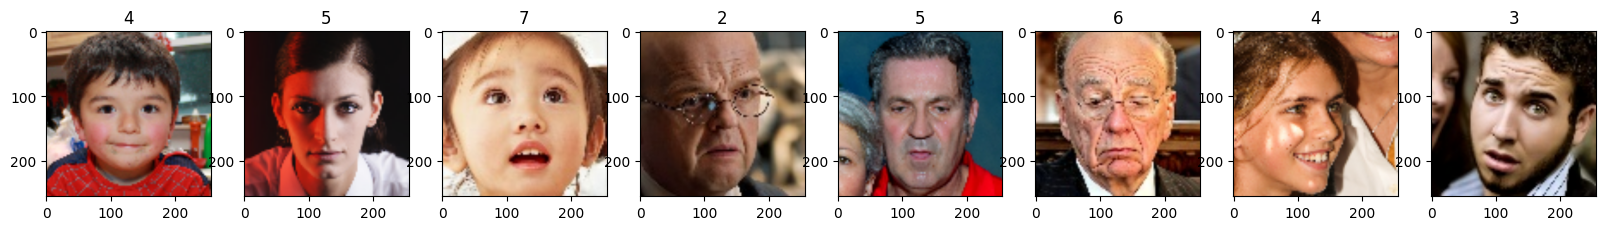

In [21]:
#To check the batch
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [22]:
batch = data_iterator.next()
batch[1]
#Images = batch[0] #Labels = bath[1]

array([1, 4, 7, 3, 4, 4, 4, 6, 6, 5, 4, 4, 7, 5, 4, 5, 1, 4, 4, 4, 4, 4,
       0, 5, 2, 2, 1, 7, 5, 4, 7, 7])

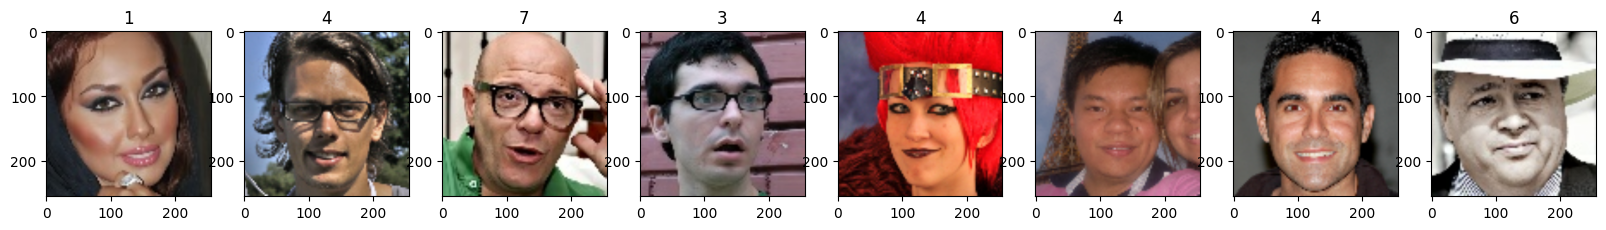

In [23]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Preprocessing Data (Scaling,spliting between train,test)

In [24]:
print(batch[0].min())
print(batch[0].max())

0.0
255.0


In [25]:
scaled = batch[0]/255
print(scaled[0].min())
print(scaled[0].max())

0.0
0.9915901


Scaling all the data at one time while loading from pipeline instead of doing it in batches

In [26]:
data=data.map(lambda x,y:(x/255,y))

In [27]:
data.as_numpy_iterator().next()

(array([[[[1.41176477e-01, 8.62745121e-02, 8.23529437e-02],
          [1.40686274e-01, 8.57843161e-02, 8.18627477e-02],
          [1.37745097e-01, 8.28431398e-02, 7.89215714e-02],
          ...,
          [1.09313726e-01, 6.22549020e-02, 7.79411793e-02],
          [1.06372550e-01, 5.93137257e-02, 7.50000030e-02],
          [1.05882354e-01, 5.88235296e-02, 7.45098069e-02]],
 
         [[1.40931368e-01, 8.55392143e-02, 8.18627477e-02],
          [1.40487134e-01, 8.51256102e-02, 8.14338252e-02],
          [1.37821689e-01, 8.26439932e-02, 7.88602978e-02],
          ...,
          [1.09589458e-01, 6.27757385e-02, 7.84620121e-02],
          [1.06832109e-01, 6.00183830e-02, 7.57046565e-02],
          [1.06372550e-01, 5.95588237e-02, 7.52450973e-02]],
 
         [[1.39460787e-01, 8.11274499e-02, 7.89215714e-02],
          [1.39292285e-01, 8.11734051e-02, 7.88602978e-02],
          [1.38281256e-01, 8.14491436e-02, 7.84926489e-02],
          ...,
          [1.11243874e-01, 6.59007356e-02, 8.1587

Spliting Test train 


In [28]:
#Total 908 batches and 32 images each ie; 32*908 = 29056
len(data)

908

In [29]:
traing_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

print(traing_size)
print(val_size)
print(test_size)
print(traing_size+val_size+test_size)

635
182
91
908


Take and skip method within tensorflow to split 

In [30]:
train=data.take(traing_size)
val=data.take(traing_size).take(val_size)
test = data.skip(traing_size+val_size).take(test_size)

In [31]:
len(test)

91

Creating CNN model

Building Deep learning model


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [33]:
#MaxPooling2D??

In [34]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))#Convolution layer 1
model.add(MaxPooling2D())#Pooling layer 1

model.add(Conv2D(32, (3,3), 1, activation='relu'))#Convolution layer 2
model.add(MaxPooling2D())#Pooling layer 2

model.add(Conv2D(16, (3,3), 1, activation='relu'))#Convolution layer 3
model.add(MaxPooling2D())#Pooling layer 3

model.add(Flatten())#Fully Connected layer

model.add(Dense(256, activation='relu'))
model.add(Dense(8, activation='softmax'))#Output layer sigmoid

In [35]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

Visualize CNN model

In [37]:
import visualkeras
visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='Neural_Network_Visualize.png') # write to disk
visualkeras.layered_view(model, to_file='Neural_Network_Visualize.png').show() # write and show

Train

In [38]:
logdir='logs'

In [39]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [40]:
Log_history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


ValueError: in user code:

    File "C:\Users\Biswaji Deb\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Biswaji Deb\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Biswaji Deb\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Biswaji Deb\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Biswaji Deb\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "C:\Users\Biswaji Deb\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Biswaji Deb\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Biswaji Deb\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Biswaji Deb\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 2432, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\Biswaji Deb\AppData\Roaming\Python\Python311\site-packages\keras\src\backend.py", line 5809, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 8) vs (None, 1)).


Performance

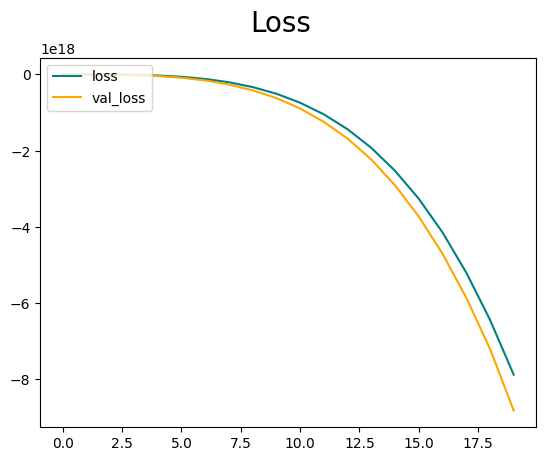

In [ ]:
fig = plt.figure()
plt.plot(Log_history.history['loss'], color='teal', label='loss')
plt.plot(Log_history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

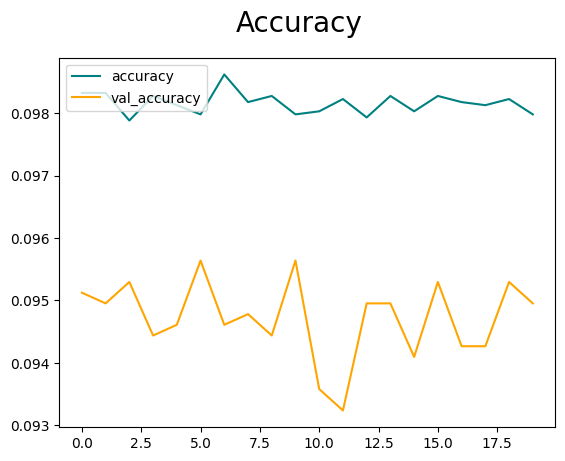

In [ ]:
fig = plt.figure()
plt.plot(Log_history.history['accuracy'], color='teal', label='accuracy')
plt.plot(Log_history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluate performance

In [ ]:
from tensorflow.keras.metrics import Precision, Recall,BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 114ms/step


In [ ]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy : {acc.result().numpy()}')

Precision:0.8923395276069641, Recall:1.0, Accuracy : 0.10041407495737076


Test

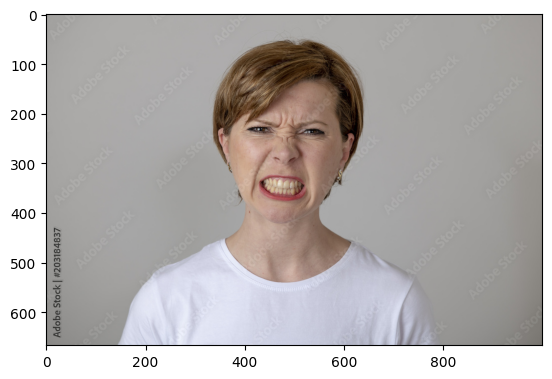

In [ ]:
img = cv2.imread('test/angry2.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

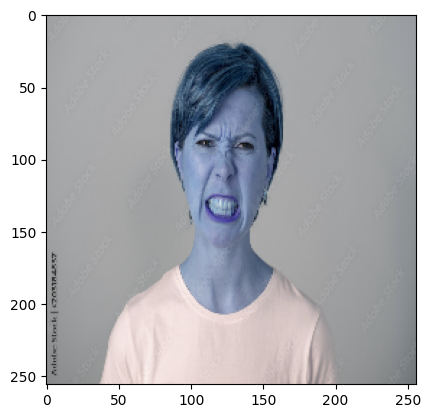

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
import numpy as np

In [ ]:
resize.shape

TensorShape([256, 256, 3])

In [ ]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [ ]:

yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 29ms/step


In [ ]:

yhat

array([[1.]], dtype=float32)

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


Save the model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','emotion_cnn.h5'))

C:\Users\Biswaji Deb\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
new_model = load_model(os.path.join('models','emotion_cnn.h5'))

In [ ]:
new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 77ms/step


array([[1.]], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


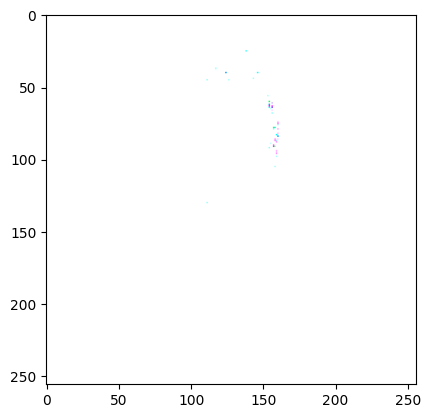

In [ ]:
plt.imshow(resize)